In [63]:
#importing the packages  
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

#import the dataset
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [64]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
train1 = train

In [66]:
train1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
train.drop('customerID', axis=1, inplace=True)

In [5]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

In [8]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod','Churn']

num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [10]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


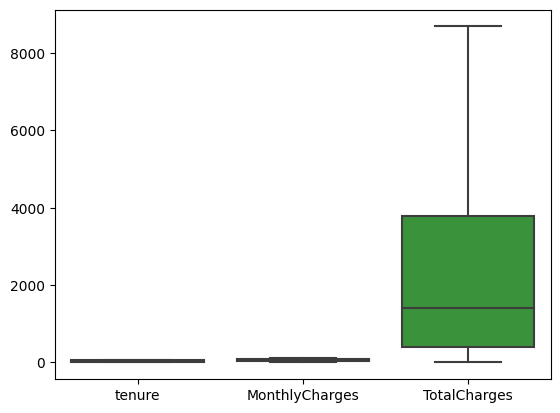

In [13]:
sns.boxplot(data=train1[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [15]:
# Create new features
train['MonthlyChargesPerTenure'] = train['MonthlyCharges'] / train['tenure']
train['TotalChargesPerTenure'] = train['TotalCharges'] / train['tenure']

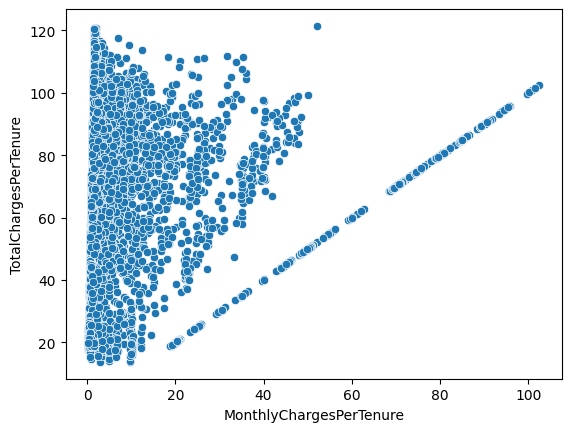

In [16]:
sns.scatterplot(x=train['MonthlyChargesPerTenure'], y=train['TotalChargesPerTenure'])
plt.show()

In [17]:
train.shape

(7043, 22)

In [18]:
train=train.dropna()
train=train.drop_duplicates()

In [19]:
train.shape


(7010, 22)

In [20]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesPerTenure,TotalChargesPerTenure
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,29.850,29.850000
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,1.675,55.573529
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,26.925,54.075000
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,0.940,40.905556
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,35.350,75.825000


## **Data Visualization**

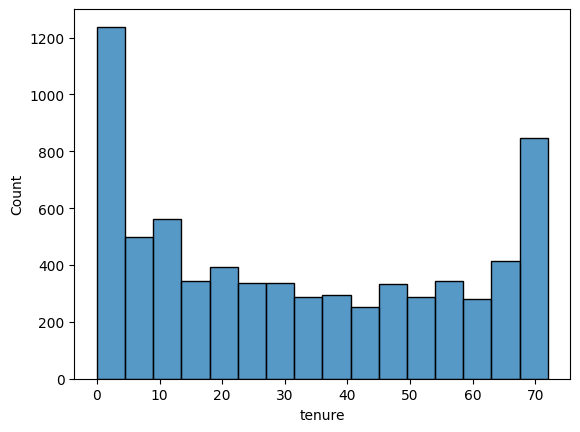

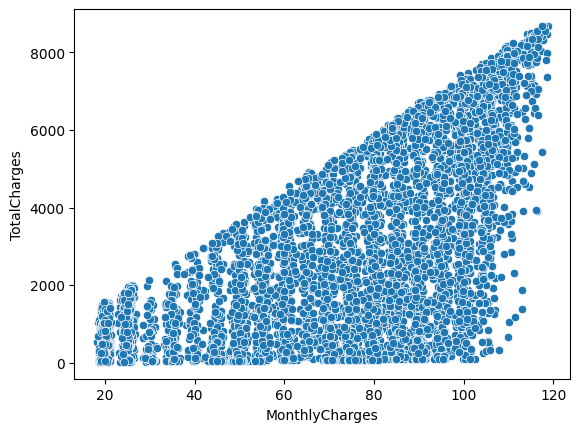

In [11]:
# create a histogram of a numeric feature
sns.histplot(train1['tenure'])
plt.show()

# create a scatter plot of two numeric features
sns.scatterplot(data=train1, x='MonthlyCharges', y='TotalCharges')
plt.show()


<ipython-input-61-4f2e7de17c42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train1['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

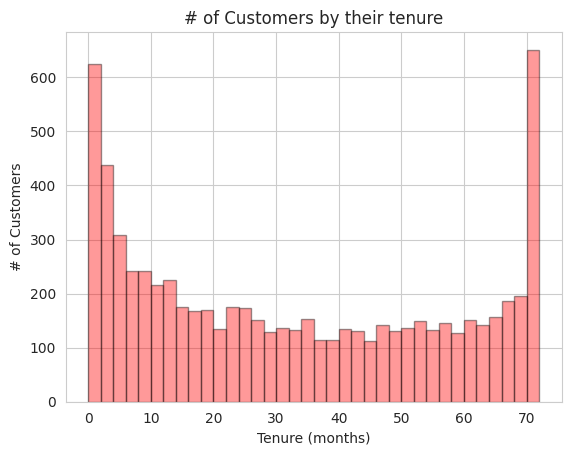

In [61]:
ax = sns.distplot(train1['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

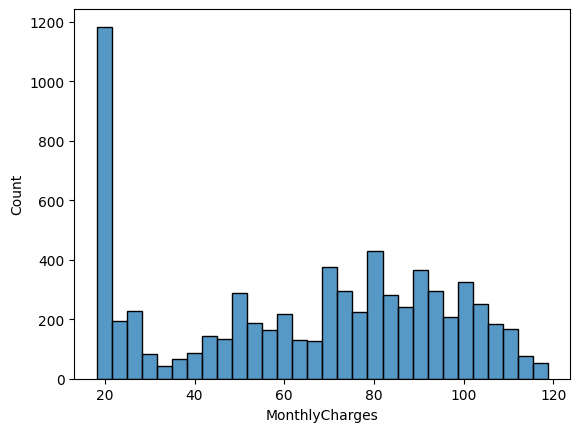

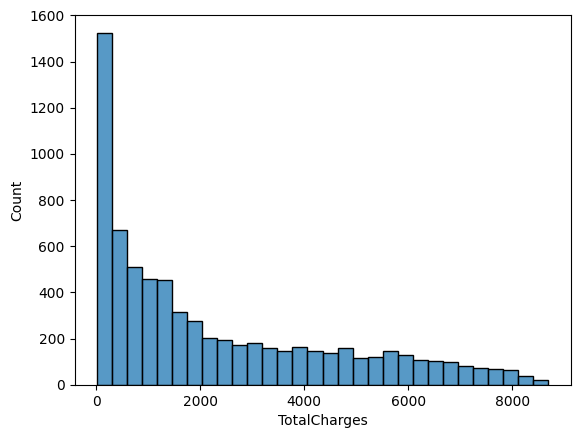

In [12]:
sns.histplot(train1['MonthlyCharges'], kde=False, bins=30)
plt.show()

sns.histplot(train1['TotalCharges'], kde=False, bins=30)
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

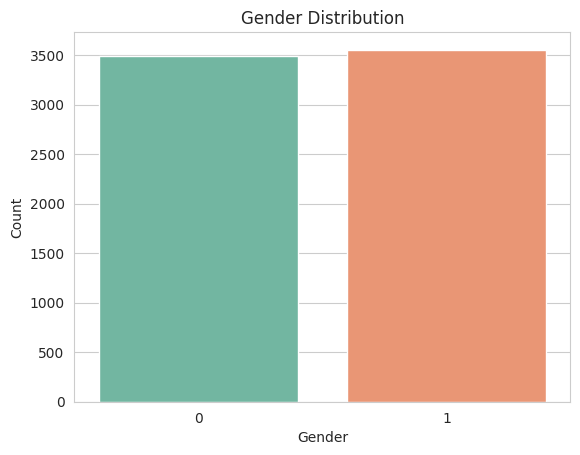

In [21]:
# Set plot style
sns.set_style("whitegrid")

# Create a bar plot of gender distribution
fig, ax = plt.subplots()
sns.countplot(x='gender', data=train1, palette='Set2')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution')


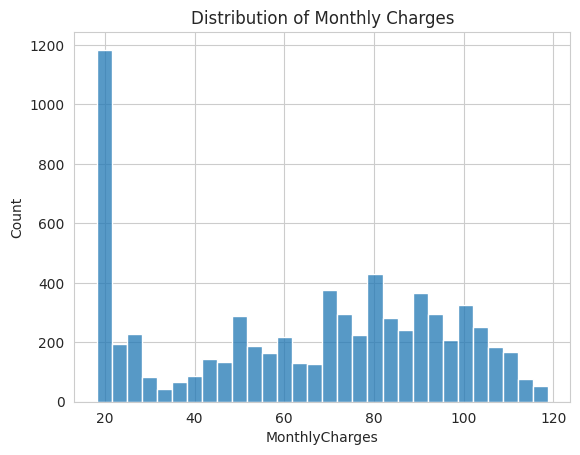

In [22]:
sns.histplot(train1['MonthlyCharges'], bins=30)
plt.title('Distribution of Monthly Charges')
plt.show()

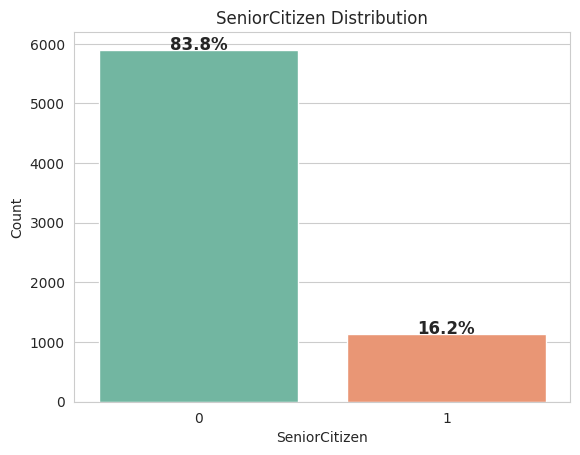

In [23]:
# Create a bar plot of gender distribution
fig, ax = plt.subplots()
sns.countplot(x='SeniorCitizen', data=train1, palette='Set2')
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Count')
ax.set_title('SeniorCitizen Distribution')


# Add percentage labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, '{:.1f}%'.format(100 * height/len(train1)),
            ha="center", fontsize=12, weight='bold')

Text(0.5, 1.0, '# of Customers by Contract Type')

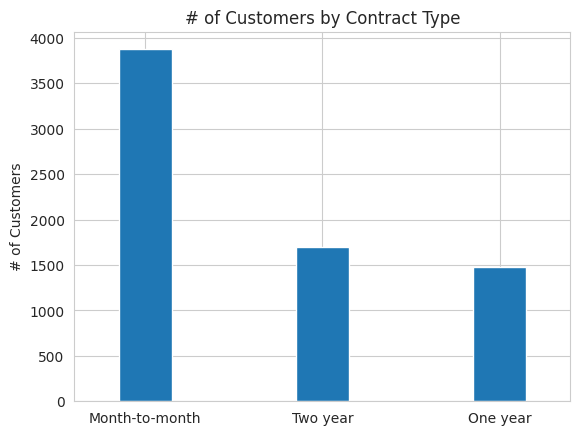

In [67]:
ax = train1['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

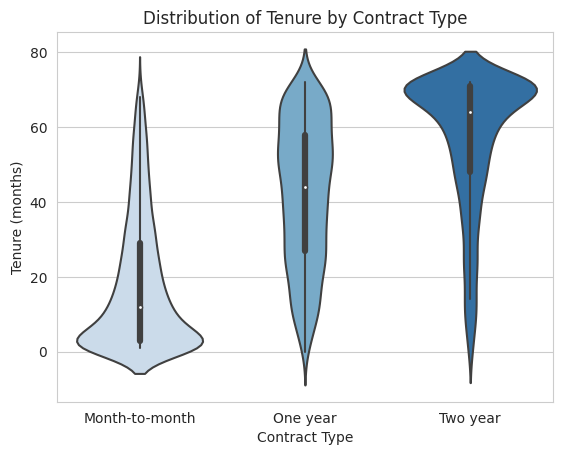

In [68]:
sns.violinplot(data=train1, x='Contract', y='tenure', palette='Blues')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (months)')
plt.title('Distribution of Tenure by Contract Type')
plt.show()

<ipython-input-69-ef000cb6f8ff>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[train1['Contract']==Contract]['tenure'], hist=False,
<ipython-input-69-ef000cb6f8ff>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[train1['Contract']==Contract]['tenure'], hist=Fal

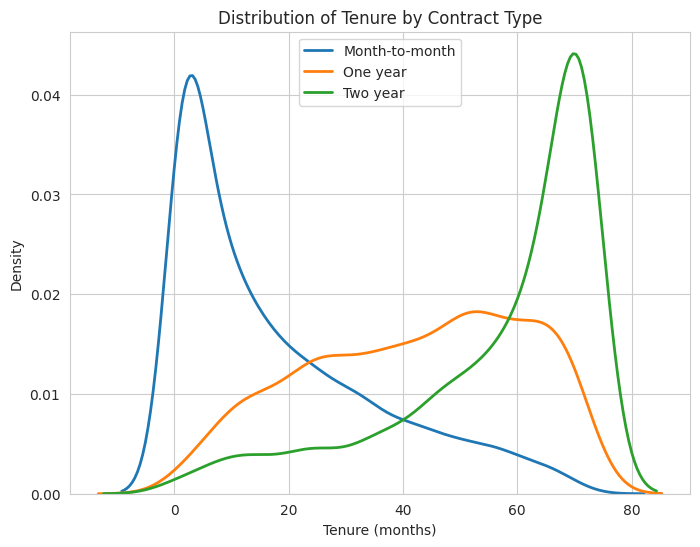

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

for Contract in train1['Contract'].unique():
    sns.distplot(train1[train1['Contract']==Contract]['tenure'], hist=False,
                 label=Contract, ax=ax, kde_kws={'linewidth': 2})

ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Tenure by Contract Type')
ax.legend()
plt.show()

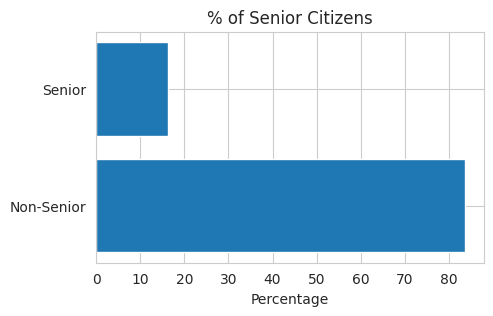

In [71]:


# calculate the percentage of senior citizens
senior_pct = 100 * train1['SeniorCitizen'].value_counts(normalize=True)[1]

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(5, 3))
ax.barh(['Non-Senior', 'Senior'], [100-senior_pct, senior_pct])
ax.set_xlabel('Percentage')
ax.set_title('% of Senior Citizens')
plt.show()

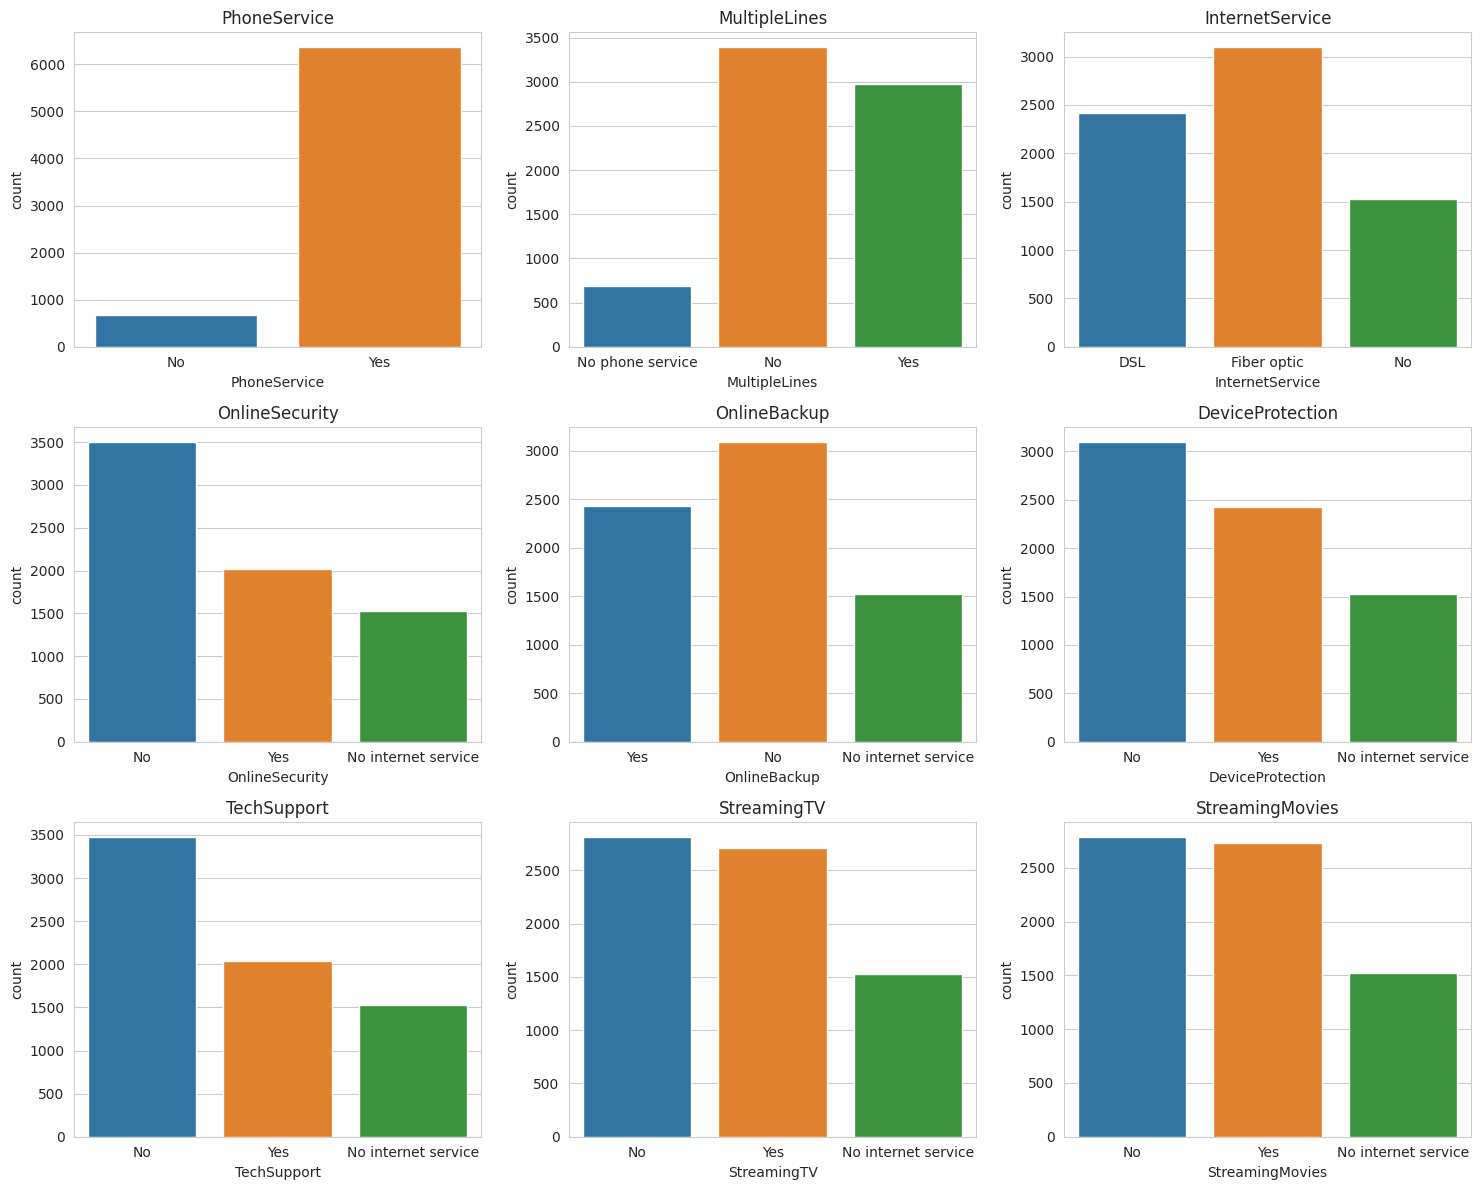

In [73]:
import seaborn as sns

# list of categorical features
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# create a grid of bar plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    ax = sns.countplot(x=service, data=train1, ax=axes[row, col])
    ax.set_title(service)

plt.tight_layout()
plt.show()

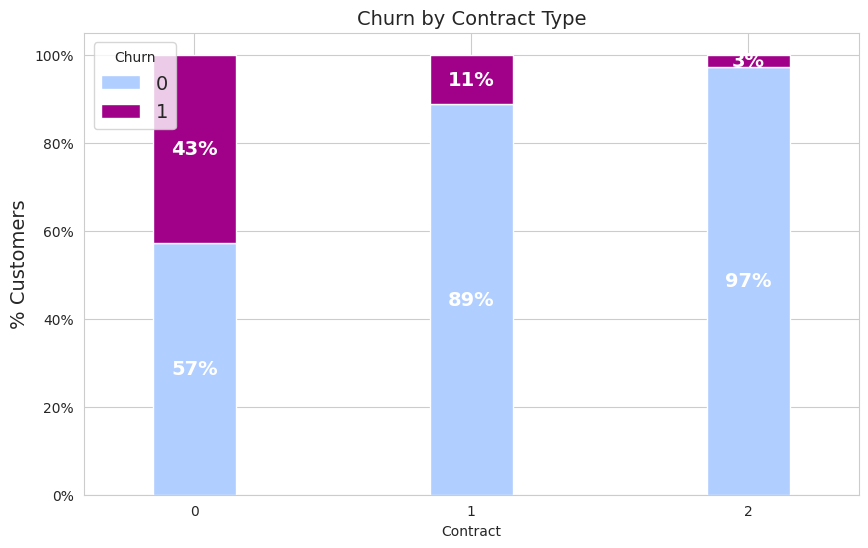

In [25]:
import seaborn as sns
import matplotlib.ticker as mtick

# Create a pivot table with Contract and Churn columns
contract_churn =  train1.pivot_table(index='Contract', columns='Churn', aggfunc='size')

# Calculate the percentage of customers in each category
contract_churn_perc = (contract_churn.T / contract_churn.sum(axis=1)).T * 100
colors = ['#b0ceff', '#a10089']
# Plot the stacked bar chart with data labels
ax = contract_churn_perc.plot(kind='bar', stacked=True, color=colors, width=0.3, rot=0, figsize=(10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Add data labels to each section of the stacked bar chart
for i, category in enumerate(contract_churn.columns):
    for j, value in enumerate(contract_churn_perc[category]):
        ax.text(j, contract_churn_perc.iloc[j, :i].sum() + value/2, '{:.0f}%'.format(value),
                ha='center', va='center', color='white', weight='bold', size=14)


From above graph we can observe that most of the customers are youngsters 

In [26]:
test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [27]:
test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [28]:
test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     object 
 1   SeniorCitizen     20 non-null     int64  
 2   Partner           20 non-null     object 
 3   Dependents        20 non-null     object 
 4   tenure            20 non-null     int64  
 5   PhoneService      20 non-null     object 
 6   MultipleLines     20 non-null     object 
 7   InternetService   20 non-null     object 
 8   OnlineSecurity    20 non-null     object 
 9   OnlineBackup      20 non-null     object 
 10  DeviceProtection  20 non-null     object 
 11  TechSupport       20 non-null     object 
 12  StreamingTV       20 non-null     object 
 13  StreamingMovies   20 non-null     object 
 14  Contract          20 non-null     object 
 15  PaperlessBilling  20 non-null     object 
 16  PaymentMethod     20 non-null     object 
 17 

In [30]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    test[col]= le.fit_transform(test[col])

In [32]:
# Create new features
test['MonthlyChargesPerTenure'] = test['MonthlyCharges'] / test['tenure']
test['TotalChargesPerTenure'] = test['TotalCharges'] / test['tenure']

In [33]:
test.shape

(20, 21)

In [34]:
test=test.dropna()
test=test.drop_duplicates()

In [35]:
test.shape

(17, 21)

In [36]:
X = train.drop('Churn', axis=1)
y = train['Churn']

In [37]:
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
train_X = train[selected_features]
test_new = selector.transform(test)
# convert test_new from numpy array to list
test_new_list = test_new.tolist()
# create new DataFrame from test_new_list
test = pd.DataFrame(test_new_list, columns=selected_features)

In [38]:
train_X.columns

Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'MonthlyChargesPerTenure', 'TotalChargesPerTenure'],
      dtype='object')

In [39]:
data = pd.concat([train_X, y], axis=1)

In [40]:
data.head()

,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,MonthlyChargesPerTenure,TotalChargesPerTenure,Churn
0,1,0,2,0,0,0,29.85,29.85,29.850,29.850000,0
1,34,2,0,2,0,1,56.95,1889.50,1.675,55.573529,0
2,2,2,2,0,0,0,53.85,108.15,26.925,54.075000,1
3,45,2,0,2,2,1,42.30,1840.75,0.940,40.905556,0
4,2,0,0,0,0,0,70.70,151.65,35.350,75.825000,1


In [41]:
from google.colab import files

data.to_csv('train.csv', index=False)

# replace "df.csv" with your file name
files.download("train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
train_X['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [43]:
test.head()

,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,MonthlyChargesPerTenure,TotalChargesPerTenure
0,25.0,2.0,3.0,3.0,2.0,0.0,106.00,2787.00,4.240,111.480000
1,1.0,0.0,2.0,0.0,0.0,0.0,30.00,30.00,30.000,30.000000
2,1.0,0.0,2.0,0.0,0.0,0.0,29.85,29.85,29.850,29.850000
3,34.0,2.0,0.0,2.0,0.0,1.0,56.95,1889.50,1.675,55.573529
4,2.0,2.0,2.0,0.0,0.0,0.0,53.85,108.15,26.925,54.075000


In [44]:
test['Contract'].unique()

array([0., 1., 2.])

In [45]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X=pd.DataFrame(min_max.fit_transform(train_X))
test=pd.DataFrame(min_max.fit_transform(test))
y_array = y.values.reshape(-1, 1)
y = pd.DataFrame(min_max.fit_transform(y_array))

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.0,1.0,0.0,0.0,0.0,0.115423,0.001275,0.289503,0.149361
1,0.464789,1.0,0.0,1.0,0.0,0.5,0.385075,0.215867,0.013769,0.388372
2,0.014085,1.0,1.0,0.0,0.0,0.0,0.354229,0.010310,0.260877,0.374448
3,0.619718,1.0,0.0,1.0,1.0,0.5,0.239303,0.210241,0.006576,0.252084
4,0.014085,0.0,0.0,0.0,0.0,0.0,0.521891,0.015330,0.343328,0.576539


In [47]:
X.shape


(7010, 10)

In [48]:
test.head()

,0,1,2,3,4,5,6,7,8,9
0,0.393443,1.0,1.000000,1.000000,1.0,0.0,1.000000,0.487883,0.096804,1.000000
1,0.000000,0.0,0.666667,0.000000,0.0,0.0,0.126939,0.000027,0.844677,0.105156
2,0.000000,0.0,0.666667,0.000000,0.0,0.0,0.125215,0.000000,0.840322,0.103509
3,0.540984,1.0,0.000000,0.666667,0.0,0.5,0.436531,0.329069,0.022336,0.386014
4,0.016393,1.0,0.666667,0.000000,0.0,0.0,0.400919,0.013855,0.755403,0.369557


In [49]:
y.head()

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


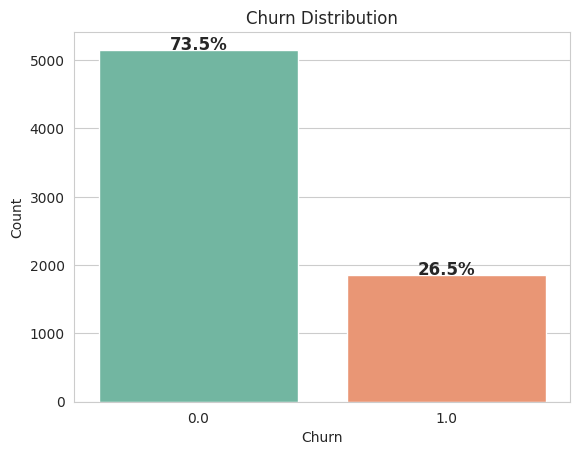

In [50]:
# Create a bar plot of gender distribution
fig, ax = plt.subplots()
sns.countplot(x=0, data=y, palette='Set2')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Churn Distribution')


# Add percentage labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, '{:.1f}%'.format(100 * height/len(y)),
            ha="center", fontsize=12, weight='bold')

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit the sampler to the training data and balance the classes
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_train, y_train)

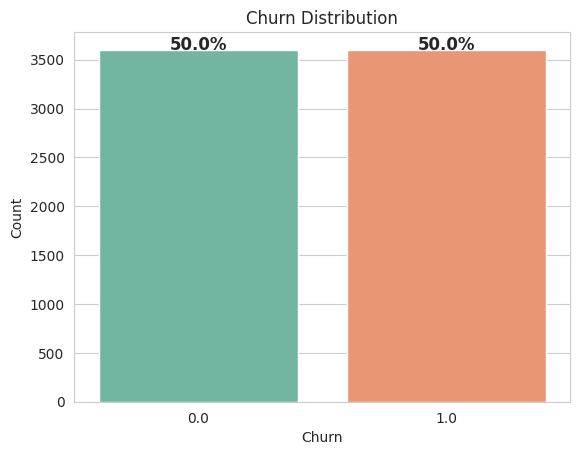

In [52]:
# Create a bar plot of gender distribution
fig, ax = plt.subplots()
sns.countplot(x=0, data=y_train, palette='Set2')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Churn Distribution')


# Add percentage labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, '{:.1f}%'.format(100 * height/len(y_train)),
            ha="center", fontsize=12, weight='bold')

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Train each model on the same training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Evaluate the performance of each model on the same test data
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)

prec_lr = precision_score(y_test, y_pred_lr)
prec_dt = precision_score(y_test, y_pred_dt)
prec_rf = precision_score(y_test, y_pred_rf)
prec_svm = precision_score(y_test, y_pred_svm)

rec_lr = recall_score(y_test, y_pred_lr)
rec_dt = recall_score(y_test, y_pred_dt)
rec_rf = recall_score(y_test, y_pred_rf)
rec_svm = recall_score(y_test, y_pred_svm)

f1_lr = f1_score(y_test, y_pred_lr)
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)
f1_svm = f1_score(y_test, y_pred_svm)

roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Print the performance of each model
print('Logistic Regression - Accuracy:', acc_lr, 'Precision:', prec_lr, 'Recall:', rec_lr, 'F1 Score:', f1_lr, 'ROC AUC:', roc_auc_lr)
print('Decision Tree - Accuracy:', acc_dt, 'Precision:', prec_dt, 'Recall:', rec_dt, 'F1 Score:', f1_dt, 'ROC AUC:', roc_auc_dt)
print('Random Forest - Accuracy:', acc_rf, 'Precision:', prec_rf, 'Recall:', rec_rf, 'F1 Score:', f1_rf, 'ROC AUC:', roc_auc_rf)
print('SVM - Accuracy:', acc_svm, 'Precision:', prec_svm, 'Recall:', rec_svm, 'F1 Score:', f1_svm, 'ROC AUC:', roc_auc_svm)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-53-a38fb15b9d6b>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression - Accuracy: 0.7535387177352206 Precision: 0.7385740402193784 Recall: 0.7849014709963918 F1 Score: 0.7610333692142088 ROC AUC: 0.7535387177352206
Decision Tree - Accuracy: 0.9926450180405217 Precision: 0.9895201323772752 Recall: 0.9958368026644463 F1 Score: 0.9926684188684466 ROC AUC: 0.9926450180405217
Random Forest - Accuracy: 0.9925062447960034 Precision: 0.9857651245551602 Recall: 0.9994449070219261 F1 Score: 0.9925578831312019 ROC AUC: 0.9925062447960032
SVM - Accuracy: 0.7657507632528449 Precision: 0.7428354045143292 Recall: 0.8129336663891201 F1 Score: 0.7763053273257354 ROC AUC: 0.7657507632528447


We can see that Decision Tree and Random Forest have highest accuray and F1 score so we will choose Random Forest model.

In [54]:
import pickle
pickle_out = open("classifier.pkl",'wb')
pickle.dump(rf,pickle_out)
pickle_out.close()

In [55]:
y_pred_rf_new = rf.predict(test)
# Print the predictions
print('Random Forest - Predictions:', y_pred_rf_new)

Random Forest - Predictions: [1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.]


In [56]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
hyperparameters = {'C': [0.1, 1, 10, 100]}

# Create a Logistic Regression model object
model1 = LogisticRegression()

clf = GridSearchCV(model1, hyperparameters, cv=5)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))'''

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the hyperparameters to tune\nhyperparameters = {\'C\': [0.1, 1, 10, 100]}\n\n# Create a Logistic Regression model object\nmodel1 = LogisticRegression()\n\nclf = GridSearchCV(model1, hyperparameters, cv=5)\n\n# Train the model on the training data\nclf.fit(X_train, y_train)\n\n# Predict the target variable for the test data\ny_pred = clf.predict(X_test)\n\n# Evaluate the performance of the model\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("Precision:", precision_score(y_test, y_pred))\nprint("Recall:", recall_score(y_test, y_pred))\nprint("F1 Score:", f1_score(y_test, y_pred))\nprint("ROC-AUC Score:", roc_auc_score(y_test, y_pred))'

In [57]:
'''from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters you want to tune
hyperparameters = {
    'max_depth': [3, 5, 7, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree model object
model2 = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model2, param_grid=hyperparameters, cv=5, n_jobs=-1)

# Train the model on the training data
grid_search.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
'''

'from sklearn.tree import DecisionTreeClassifier\n\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the hyperparameters you want to tune\nhyperparameters = {\n    \'max_depth\': [3, 5, 7, None],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'criterion\': [\'gini\', \'entropy\']\n}\n\n# Create a Decision Tree model object\nmodel2 = DecisionTreeClassifier()\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(estimator=model2, param_grid=hyperparameters, cv=5, n_jobs=-1)\n\n# Train the model on the training data\ngrid_search.fit(X_train, y_train)\n\n# Predict the target variable for the test data\ny_pred = grid_search.predict(X_test)\n\n# Evaluate the performance of the model\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("Precision:", precision_score(y_test, y_pred))\

In [58]:
'''from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Create a Random Forest model object
model3 = RandomForestClassifier()

grid_search1= GridSearchCV(
    estimator=model3,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)


# Train the model on the training data
grid_search1.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = grid_search1.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))'''

'from sklearn.ensemble import RandomForestClassifier\n\n# Define the parameter grid to search over\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 5, 10],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n\n# Create a Random Forest model object\nmodel3 = RandomForestClassifier()\n\ngrid_search1= GridSearchCV(\n    estimator=model3,\n    param_grid=param_grid,\n    scoring=\'accuracy\',\n    cv=5,\n    n_jobs=-1,\n    verbose=1\n)\n\n\n# Train the model on the training data\ngrid_search1.fit(X_train, y_train)\n\n# Predict the target variable for the test data\ny_pred = grid_search1.predict(X_test)\n\n# Evaluate the performance of the model\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("Precision:", precision_score(y_test, y_pred))\nprint("Recall:", recall_score(y

In [59]:
'''from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create a SVM model object
model4 = SVC()

grid = GridSearchCV(model4, param_grid, cv=5, scoring='accuracy')

# Train the model on the training data
grid.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = grid.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))'''

'from sklearn.svm import SVC\n\nparam_grid = {\'C\': [0.1, 1, 10], \'kernel\': [\'linear\', \'rbf\']}\n\n# Create a SVM model object\nmodel4 = SVC()\n\ngrid = GridSearchCV(model4, param_grid, cv=5, scoring=\'accuracy\')\n\n# Train the model on the training data\ngrid.fit(X_train, y_train)\n\n# Predict the target variable for the test data\ny_pred = grid.predict(X_test)\n\n# Evaluate the performance of the model\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("Precision:", precision_score(y_test, y_pred))\nprint("Recall:", recall_score(y_test, y_pred))\nprint("F1 Score:", f1_score(y_test, y_pred))\nprint("ROC-AUC Score:", roc_auc_score(y_test, y_pred))'